In [50]:
# imports

from scipy.linalg import hadamard
from skimage import io
from skimage import data
from scipy.fftpack import dct
from scipy.fftpack import idct
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import scipy

In [14]:
# hadamard matrix of order N

N = int(input("enter matrix order: "))
print(hadamard(N))

enter matrix order: 4
[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [18]:
# implementing 2D Hadamard on a given NxN matrix

mat = [[10,10,10,10], [20,20,20,20], [20,20,20,20], [20,20,20,20]]
H = hadamard(N)
#using np.dot function for matrix multiplication
mat_had1 = np.dot(H, mat)
mat_had = np.dot(mat_had1, np.transpose(H))

In [19]:
mat_had1

array([[ 70,  70,  70,  70],
       [-10, -10, -10, -10],
       [-10, -10, -10, -10],
       [-10, -10, -10, -10]])

In [20]:
mat_had

array([[280,   0,   0,   0],
       [-40,   0,   0,   0],
       [-40,   0,   0,   0],
       [-40,   0,   0,   0]])

In [21]:
mat_had[2,0]=0
mat_had[3,0]=0
mat_had

array([[280,   0,   0,   0],
       [-40,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

In [22]:
# inverse hadamard transform

mat_new1 = np.dot(np.transpose(H), mat_had)
mat_new = np.dot(mat_new1, H)
mat_new = mat_new//(N*N)
mat_new

array([[15, 15, 15, 15],
       [20, 20, 20, 20],
       [15, 15, 15, 15],
       [20, 20, 20, 20]])

In [24]:
print(mat)
print("\n", H)
print("\n", mat_had)
print("\n", mat_new)

[[10, 10, 10, 10], [20, 20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20]]

 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]

 [[280   0   0   0]
 [-40   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]

 [[15 15 15 15]
 [20 20 20 20]
 [15 15 15 15]
 [20 20 20 20]]


In [25]:
# walsh transform

H = ([[1,1,1,1], [1,1,-1,-1], [1,-1,1,-1], [1,-1,-1,1]])
H = np.array(H)
H = H/4

In [27]:
# walsh tranform of image

N = 4
mat = np.random.randint(20, size=(N,N))
#using np.dot function for matrix multiplication
mat_walsh = np.dot(H, mat)
mat_walsh = np.dot(mat_walsh, np.transpose(H))

In [30]:
# inverse walsh transform

mat_new = np.dot(np.transpose(H), mat_walsh)
mat_new = np.dot(mat_new, H)
mat_new = mat_new*(N*N)

In [31]:
print(mat)
print("\n", H)
print("\n", mat_walsh)
print("\n", mat_new)

[[12  4 11  6]
 [ 9  5 16  1]
 [15  6 15 12]
 [ 5 17  4 18]]

 [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25]]

 [[ 9.75  -0.625  1.125  0.   ]
 [-1.75   0.125  2.875 -1.   ]
 [ 0.375 -0.25   2.     1.125]
 [-0.125  0.5   -2.75   0.625]]

 [[12.  4. 11.  6.]
 [ 9.  5. 16.  1.]
 [15.  6. 15. 12.]
 [ 5. 17.  4. 18.]]


In [34]:
# hadamard transform function
# F = HfH

def had2(f,N):
  H = hadamard(N)
  F = np.dot(np.dot(H,f),H)
  return(F)

In [36]:
# inverse Hadamard
# f = (HFH)/N*N

def had2inv(F,N):
  H = hadamard(N)
  f = np.dot(np.dot(H,F),H)
  f = f//(N*N)
  return(f)

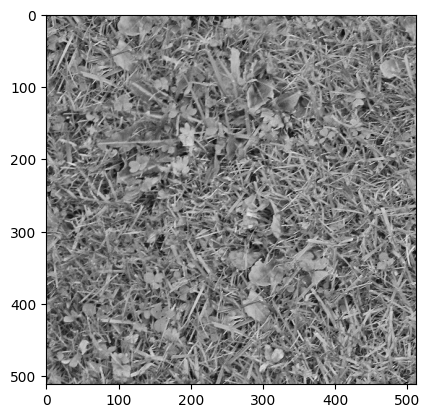

In [40]:
img=data.grass()
sh = img.shape
plt.imshow(img, cmap="gray")

In [42]:
sh
r = sh[0]
c = sh[1]

In [43]:
512//4

128

Text(0.5, 1.0, 'hadamard coefficients')

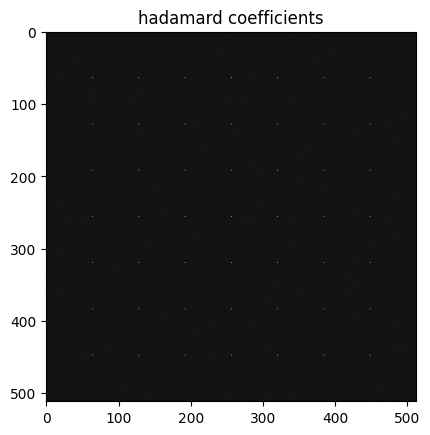

In [44]:
# hadamard transform on input image by dividing image in 8X8 blocks

N= 64 # size of the block
imghad = np.zeros((r,c), dtype=int)

for row in range(r//N):
  for col in range(c//N):
    imghad[row*N:(row+1)*N, col*N:(col+1)*N] = had2(img[row*N:(row+1)*N, col*N:(col+1)*N], N)

plt.imshow(imghad, cmap="gray")
plt.title('hadamard coefficients')

In [47]:
# inverse Hadamard transform

N = 64
imgnew = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    imgnew[row*N:(row+1)*N, col*N:(col+1)*N] = had2inv(imghad[row*N:(row+1)*N, col*N:(col+1)*N], N)

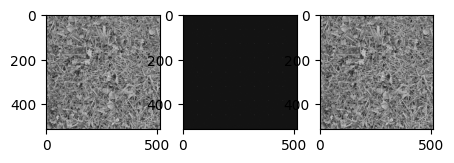

In [49]:
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(imghad, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(imgnew, cmap="gray")

In [53]:
z = [[10,10,10,10], [10,20,20,10], [10,20,20,10], [10,10,10,10]]
x = dct(z)
x

array([[ 80.        ,   0.        ,   0.        ,   0.        ],
       [120.        ,   0.        , -28.28427125,   0.        ],
       [120.        ,   0.        , -28.28427125,   0.        ],
       [ 80.        ,   0.        ,   0.        ,   0.        ]])

In [55]:
idct(z)/8

array([[ 6.28417437, -1.8707572 ,  0.8352233 , -0.24864046],
       [10.36164015, -2.68181558, -1.88925224, -0.79057234],
       [10.36164015, -2.68181558, -1.88925224, -0.79057234],
       [ 6.28417437, -1.8707572 ,  0.8352233 , -0.24864046]])

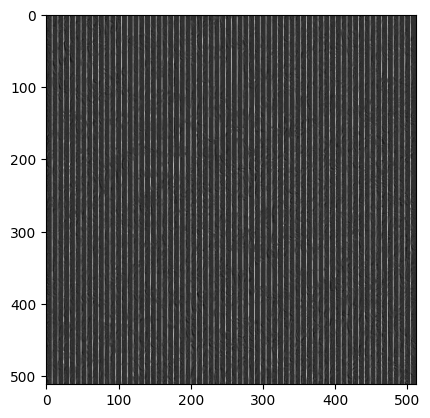

In [58]:
m,n = img.shape
N = 8

imgdct = np.zeros((m,n), dtype=int)

for r in range(m//N):
  for c in range(n//N):
    temp=dct(img[r*N:(r+1)*N, c*N:(c+1)*N])
    imgdct[r*N:(r+1)*N, c*N:(c+1)*N] = temp

plt.imshow(imgdct, cmap='gray')

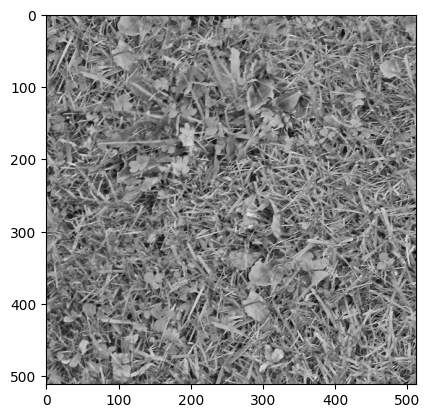

In [59]:
imgidct = np.zeros((m,n), dtype=int)

for r in range(m//N):
  for c in range(n//N):
    imgidct[r*N:(r+1)*N,c*N:(c+1)*N] = idct(imgdct[r*N:(r+1)*N,c*N:(c+1)*N])

plt.imshow(imgidct,cmap='gray')

In [66]:
a = [[0.5,0.5,0.5,0.5], [0.6,0.3,-0.3,-0.6], [0.5,-0.5,-0.5,0.5], [0.3,-0.6,0.6,-0.3]]
# using np.dot function for matrix multiplication
mat_dct1 = np.dot(a,z)
mat_dct = np.dot(mat_dct1, np.transpose(a))
mat_dct1

array([[ 2.00000000e+01,  3.00000000e+01,  3.00000000e+01,
         2.00000000e+01],
       [ 2.22044605e-16,  2.22044605e-16,  2.22044605e-16,
         2.22044605e-16],
       [ 0.00000000e+00, -1.00000000e+01, -1.00000000e+01,
         0.00000000e+00],
       [ 1.11022302e-16, -3.33066907e-16, -3.33066907e-16,
         1.11022302e-16]])

In [67]:
mat_dct

array([[ 5.00000000e+01,  4.44089210e-16, -1.00000000e+01,
        -6.66133815e-16],
       [ 4.44089210e-16, -2.46519033e-32,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+01, -1.11022302e-16,  1.00000000e+01,
         2.22044605e-16],
       [-2.22044605e-16,  0.00000000e+00,  4.44089210e-16,
         1.84889275e-32]])

In [69]:
y = [[50,0,-10,0], [0,0,0,0], [-10,0,10,0], [0,0,0,0]]
m_new1= np.dot(np.transpose(a), y)
m_new=np.dot(m_new1, a)
m_new

array([[10., 10., 10., 10.],
       [10., 20., 20., 10.],
       [10., 20., 20., 10.],
       [10., 10., 10., 10.]])

In [71]:
dct(y)/16

array([[ 5.        ,  6.25260137,  5.30330086,  1.23692204],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.63320371, -1.76776695,  0.67649513],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])